# Multi-Arm Bandit Algorithm : Optimistic Initial Values

In [1]:
import pandas as pd 
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

## Example : Guassian Reward

In [2]:
def run_experiment(number_of_bandit, q_true,  Q_initial, eps, number_of_run, number_of_time_step):
    
    sum_of_rewards        = np.zeros( number_of_time_step )
    sum_of_regrets        = np.zeros( number_of_time_step )
    count_of_actions      = np.zeros( (number_of_time_step, number_of_bandit) )
    count_of_best_actions = np.zeros( number_of_time_step )
    value_of_Q_act        = np.zeros((number_of_run, number_of_time_step, number_of_bandit) )
    #value_of_rewards      = np.zeros((number_of_run, number_of_time_step) )
        
    q_star = np.random.choice( np.where(q_true == q_true.max())[0] )
    
    for r in range(number_of_run):    
        N_act = np.repeat( Q_initial/5, number_of_bandit )
        Q_act = np.repeat( Q_initial, number_of_bandit )
    
        list_of_actions = []
        list_of_rewards = []
        list_of_regrets = []
        list_of_best_actions = np.zeros( number_of_time_step )
        
        for t in range(number_of_time_step):
            """Step 1: Choose an action"""
            rand_prob = np.random.rand()
            if rand_prob <= eps:
                """pick one of the slot machines randomly"""
                A = np.random.choice(number_of_bandit)
            else:
                """pick the slot machine that has the highest expected reward"""
                #A = np.argmax( Q_act )
                
                #Q_max = Q_act.max()
                #A = np.random.choice(np.flatnonzero(Q_act == Q_max))
                
                Q_max = Q_act.max()
                A = np.random.choice(np.where(Q_act == Q_max)[0])
     
            """Step 2: Get a reward corresponding to that action"""
            reward = np.random.normal(q_true[A],1)
            
            """Step 3: Update N and Q"""
            N_act[A] += 1
            Q_act[A] += (reward - Q_act[A])/N_act[A]
            
            #list_of_actions.append(A)
            #list_of_rewards.append(reward)
            #value_of_Q_act[r,t,A] = Q_act[A]
            
            """Step 4: Collect actions, rewards, and regrets"""
            list_of_actions.append(A)
            list_of_rewards.append(reward)
            value_of_Q_act[r,t,A] = Q_act[A]
            
            regret = q_star - q_true[A]
            list_of_regrets.append(regret)
            
            if A == np.argmax(q_true):
                list_of_best_actions[t] += 1
            
        sum_of_rewards += np.array(list_of_rewards)
        sum_of_regrets += np.array(list_of_regrets)
        count_of_best_actions += np.array( list_of_best_actions )
        
        for step, arm in enumerate(list_of_actions):
            count_of_actions[step][arm] += 1
        
        # Useful metric to explain the kink 
        #value_of_rewards[r,:] = list_of_rewards
        
    average_reward         = sum_of_rewards /np.float(number_of_run)
    average_regret         = sum_of_regrets /np.float(number_of_run)
    percent_of_best_action = count_of_best_actions /np.float(number_of_run)
    
    return average_reward, average_regret, percent_of_best_action, value_of_Q_act, count_of_actions

In [3]:
rg = np.random.default_rng( seed=1709 )

number_of_bandit    = 10
number_of_run       = 5000
number_of_time_step = 1000

q_true = rg.normal(0, 1, number_of_bandit)

average_reward_01_00, average_regret_01_00, best_action_01_00, Qt00, action_0 = run_experiment(number_of_bandit, q_true, 0.0, 0.1, number_of_run, number_of_time_step)
average_reward_00_50, average_regret_00_50, best_action_00_50, Qt50, action_1 = run_experiment(number_of_bandit, q_true, 5.0, 0.0, number_of_run, number_of_time_step)

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]),
 <a list of 8 Text major ticklabel objects>)

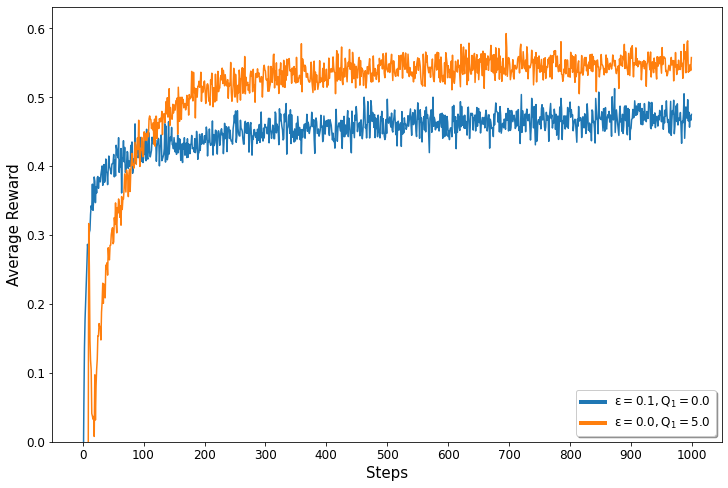

In [4]:
# Plot reward results
plt.figure(figsize = (12, 8)) 
plt.plot(average_reward_01_00, label =r'$\mathrm{\epsilon}=0.1, \mathrm{Q_1}=0.0$') 
plt.plot(average_reward_00_50, label =r'$\mathrm{\epsilon}=0.0, \mathrm{Q_1}=5.0$') 
plt.xlabel("Steps", fontsize=15)
plt.ylabel("Average Reward", fontsize=15)
legend = plt.legend(loc='lower right', fontsize=12, shadow=True)
for leg in legend.legendHandles:
    leg.set_linewidth(4)
#plt.xlim([-25, number_of_time_step])
plt.ylim(ymin=0)
plt.xticks(np.arange(0,1100,100), fontsize=12)
plt.yticks(fontsize=12)

(array([-0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2]),
 <a list of 9 Text major ticklabel objects>)

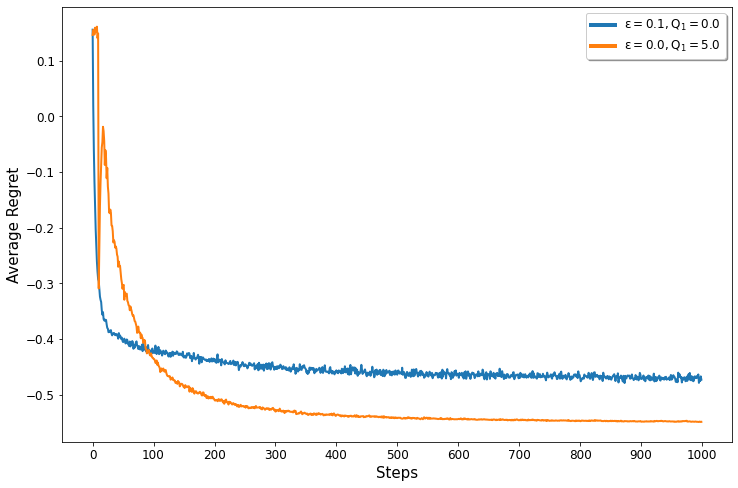

In [5]:
# Plot regret results
plt.figure(figsize = (12, 8)) 
plt.plot(average_regret_01_00, linewidth=2, label =r'$\mathrm{\epsilon}=0.1, \mathrm{Q_1}=0.0$') 
plt.plot(average_regret_00_50, linewidth=2, label =r'$\mathrm{\epsilon}=0.0, \mathrm{Q_1}=5.0$')

plt.xlabel("Steps", fontsize=15)
plt.ylabel("Average Regret", fontsize=15)
legend = plt.legend(loc='upper right', fontsize=12, shadow=True)
for leg in legend.legendHandles:
    leg.set_linewidth(4)
#plt.xlim([-25, number_of_time_step])
#plt.ylim(ymin=1)
plt.xticks(np.arange(0,1100,100), fontsize=12)
plt.yticks(fontsize=12)

(array([ 0., 10., 20., 30., 40., 50., 60.]),
 <a list of 7 Text major ticklabel objects>)

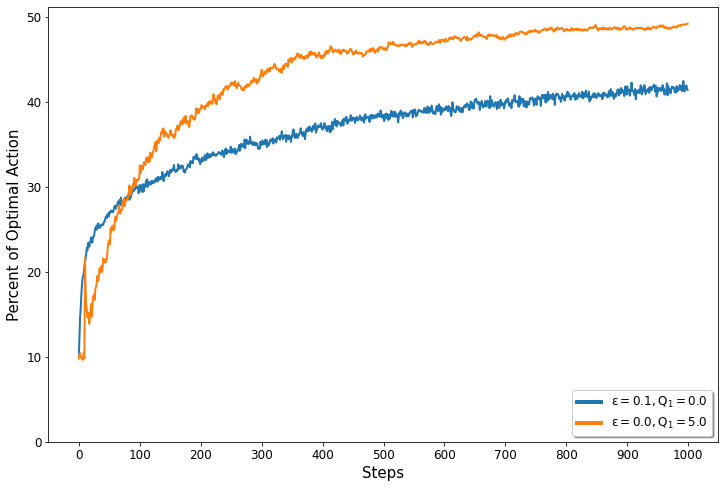

In [6]:
# Plot action results
plt.figure(figsize = (12, 8)) 
plt.plot(100*best_action_01_00, linewidth=2, label =r'$\mathrm{\epsilon}=0.1, \mathrm{Q_1}=0.0$') 
plt.plot(100*best_action_00_50, linewidth=2, label =r'$\mathrm{\epsilon}=0.0, \mathrm{Q_1}=5.0$') 
plt.xlabel("Steps", fontsize=15)
plt.ylabel("Percent of Optimal Action", fontsize=15)
legend = plt.legend(loc='lower right', fontsize=12, shadow=True)
for leg in legend.legendHandles:
    leg.set_linewidth(4)
#plt.xlim([-25, number_of_time_step])
plt.ylim(ymin=0)
plt.xticks(np.arange(0,1100,100), fontsize=12)
plt.yticks(fontsize=12)

(0.0, 175.0)

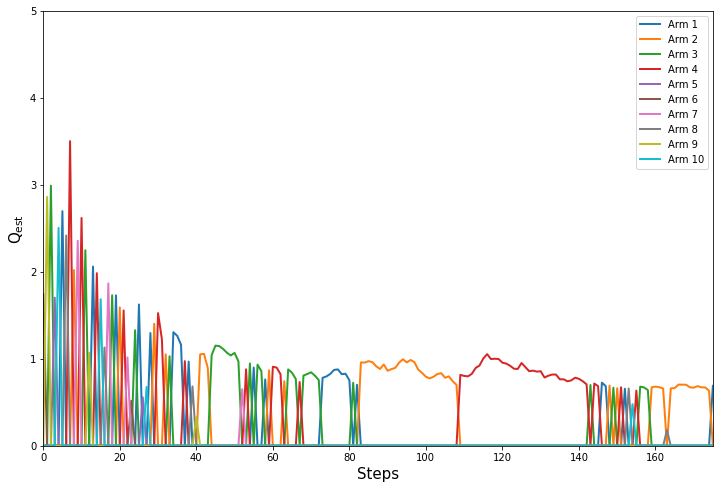

In [7]:
plt.figure(figsize = (12, 8))
for i in range( number_of_bandit ):
    Q_est = Qt50[0, :, i]
    steps = list( np.array(range(len(Q_est))) )
    plt.plot( steps, Q_est, "-", linewidth=2, label="Arm {}".format(i+1) )
plt.xlabel("Steps", fontsize=15)
plt.ylabel(r"$\mathrm{Q_{est}}$", fontsize=15)
plt.legend() 
plt.ylim(ymin=0, ymax=5)
plt.xlim(xmin=0, xmax=175)

(array([  0.,  20.,  40.,  60.,  80., 100.]),
 <a list of 6 Text major ticklabel objects>)

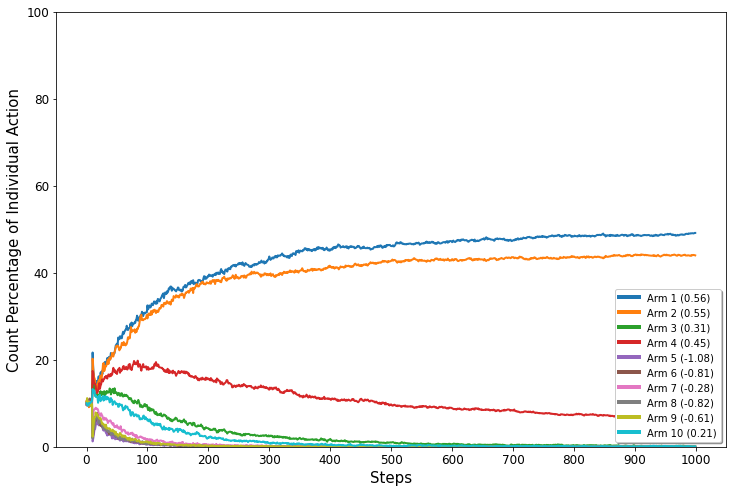

In [8]:
# Plot individual action results
plt.figure(figsize = (12, 8)) 

action = [action_0, action_1]

for i in range( number_of_bandit ):
    action_pct = 100 * action[1][:,i] / number_of_run
    steps = list( np.array(range(len(action_pct))) )
    plt.plot( steps, action_pct, "-", linewidth=2, label="Arm {} ({:.2f})".format(i+1, q_true[i]))
plt.xlabel("Steps", fontsize=15)
plt.ylabel("Count Percentage of Individual Action", fontsize=15)
legend = plt.legend(loc='lower right', shadow=True)
for leg in legend.legendHandles:
    leg.set_linewidth(4)
#plt.xlim([-1, number_of_time_step])
plt.ylim(ymin=0, ymax=100)
plt.xticks(np.arange(0,1100,100), fontsize=12)
plt.yticks(fontsize=12)